In [1]:
import pandas as pd
import nltk
nltk.usage(nltk.classify.ClassifierI)
import nltk
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
#transform
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#classifiers
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#utilities
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#graphing
import seaborn as sns

<ipython-input-1-c53dd587ccc8>:3: DeprecationWarning: 
  Function usage() has been deprecated.  Use help(obj) instead.
  nltk.usage(nltk.classify.ClassifierI)


ClassifierI supports the following operations:
  - self.classify(featureset)
  - self.classify_many(featuresets)
  - self.labels()
  - self.prob_classify(featureset)
  - self.prob_classify_many(featuresets)


In [2]:
def assign_mood(row):
    if row['energy'] >= 0.8 and row['valence'] >= 0.04 and row['danceability'] >= 0.4:
        return 'energetic'
    elif row['energy'] < 0.2240 and row['valence'] < 0.393 and row['danceability'] < 0.507:
        return 'sad'
    elif row['energy'] >= 0.7 and row['valence'] >= 0.7 and row['danceability'] >= 0.6:
        return 'happy'
    elif row['energy'] <= 0.320 and row['valence'] >= 0.3 and row['danceability'] >= 0.572:
        return 'romantic'
    elif row['energy'] >= 0.000282 and row['valence'] >= 0.01 and row['danceability'] >= 0.0499:
        return 'inspiring'
    elif row['energy'] > 0.2 and row['valence'] >= 0.6 and row['danceability'] >= 0.5:
        return 'hopeful'
    elif row['energy'] > 0.324 and row['valence'] >= 0.03 and row['danceability'] >= 0.2:
        return 'calm'
    elif row['energy'] < 0.324 and row['valence'] <= 0.239 and row['danceability'] <= 0.658:
        return 'reflective'
    elif row['energy'] >= 0.858 and row['valence'] < 0.682 and row['danceability'] < 0.737:
        return 'upbeat'

    # Add more conditions for other mood types

In [68]:
df_m = pd.read_csv('/content/df_comb_with_mood.csv')

In [89]:
df_m.head(1)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,liveness,valence,tempo,time_signature,SLink,Lyric,language,Genres,clean lyric,Mood
0,1XXimziG1uhM0eDNCZCrUl,Up,92,156945,1,cardi b,['4kYSro6naA4h99UJvo89HB'],2021-02-05,0.868,0.795,...,0.0461,0.819,166.0,4,/cardi-b/up.html,"Up, up, up (Ayy) , up (Uh) , up, look (This is...",en,"['Hip Hop', 'Rap']",ayy uh look fire upon time man heard ugly came...,happy


In [81]:
#df_m  ['Mood'] = df_m .apply(assign_mood, axis=1)

In [76]:
#df_m.head(1)



In [77]:
df_m.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
SLink               0
Lyric               0
language            0
Genres              0
clean lyric         0
Mood                0
dtype: int64

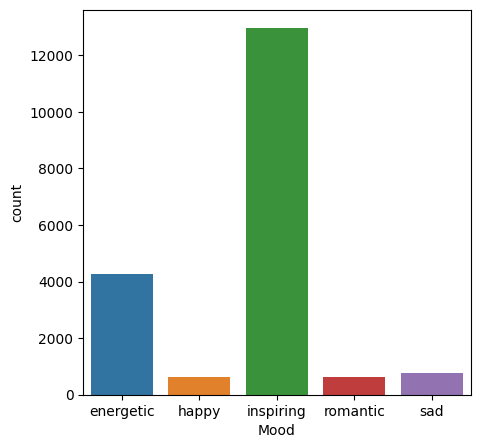

In [82]:
import pandas as pd
import seaborn as sns

# Assuming you have a DataFrame called 'df' and a column named 'mood' containing mood labels
# Convert the 'mood' column to categorical data type
df_m['Mood'] = pd.Categorical(df_m['Mood'])

# Plot the count of each mood category
sns.countplot(data=df_m, x='Mood')

# Display the plot
plt.show()

In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

In [86]:
features_for_mood = ['energy', 'danceability', 'valence']


hyper_opt = False

#split into trainval and test
trainx, testx, trainy, testy = train_test_split(df_m[features_for_mood], df_m['Mood'], test_size = 0.33,
                                                random_state = 42, stratify=df_m['Mood'])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(trainx)

nn = MLPClassifier(max_iter = 15000, alpha=1.0, hidden_layer_sizes=8)
scores = cross_val_score(nn, train_scaled, trainy, cv=5)
print ("cv score: " + str(scores.mean()))

if hyper_opt:
    params = {"alpha": np.logspace(-4, 2, 7), 'hidden_layer_sizes': [1, 2, 5, 10, 20, 50, 100]}
    clf = GridSearchCV(nn, params)
    clf.fit(train_scaled, trainy)
    print("hyperparam optimized score : " + str(clf.best_score_))
    import pdb
    pdb.set_trace()

cv score: 0.9283672394099176


In [87]:
from sklearn.model_selection import cross_validate

In [88]:
results = cross_validate(nn, train_scaled, trainy, return_train_score=True)

In [16]:
results

{'fit_time': array([5.70982933, 4.79780936, 5.87869024, 6.74063182, 8.36857939]),
 'score_time': array([0.00361753, 0.00365877, 0.00366116, 0.00373507, 0.00438499]),
 'test_score': array([0.91753775, 0.93418506, 0.93147503, 0.93609605, 0.93144849]),
 'train_score': array([0.93117135, 0.93523717, 0.92729913, 0.9314684 , 0.93204917])}

In [17]:
nn = MLPClassifier(hidden_layer_sizes=8, max_iter=15000, alpha=1.0)

In [18]:
nn.fit(train_scaled, trainy)
test_preds = nn.predict(scaler.transform(testx))
accuracy_score(test_preds, testy)

0.9311429020594246

In [92]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [93]:
conf_matrix = confusion_matrix(testy, test_preds, labels = df_m['Mood'].unique().tolist())

In [94]:
labels = df_m['Mood'].unique().tolist()

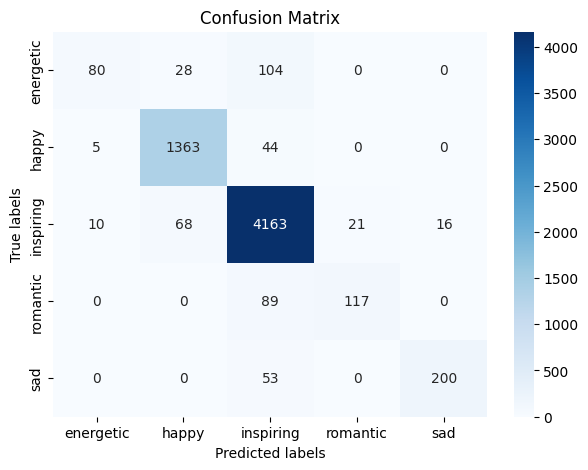

In [99]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.rcParams['figure.figsize'] = (7, 5)
# Define the labels
labels = ['energetic', 'happy', 'inspiring', 'romantic', 'sad']

# Create the subplot and plot the confusion matrix
ax = plt.subplot()
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set the tick labels
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Display the plot
plt.show()

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5,5)

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(nn, train_scaled, trainy, cv=5)

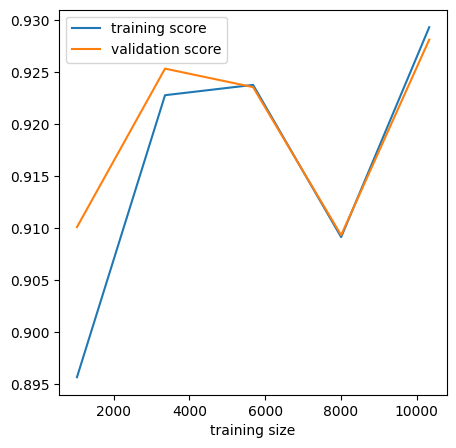

In [25]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='training score')
plt.plot(train_sizes, val_scores_mean, label='validation score')
plt.xlabel('training size')
plt.legend()



---

#RandomForest Classiefier

In [26]:
#Importing Libraries Execute the following script to import the required libraries
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
#Importing the Dataset
music_data =pd.read_csv('/content/df_comb_with_mood.csv')
X, y = music_data['clean lyric'], music_data['Mood']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(music_data['clean lyric']).toarray()

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[   0    0    0   12   12    2    0    0]
 [   0    1    0   43  111    5    0    0]
 [   0    0    3   35   41    7    0    0]
 [   0    0    0  576  508   37    0    0]
 [   0    0    0  191 1048   39    1    0]
 [   0    0    0  176  368  165    0    0]
 [   0    0    1   23   40   18    4    0]
 [   0    0    0  171  182   25    0   10]]
              precision    recall  f1-score   support

        Calm       0.00      0.00      0.00        26
   Energetic       1.00      0.01      0.01       160
       Happy       0.75      0.03      0.07        86
     Hopeful       0.47      0.51      0.49      1121
   Inspiring       0.45      0.82      0.58      1279
  Reflective       0.55      0.23      0.33       709
    Romantic       0.80      0.05      0.09        86
         Sad       1.00      0.03      0.05       388

    accuracy                           0.47      3855
   macro avg       0.63      0.21      0.20      3855
weighted avg       0.57      0.47      0.41      3855

0.46

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




---



---



In [39]:
import pandas as pd

#Importing the Dataset
music_data = pd.read_csv('df_comb_with_mood.csv')


In [40]:

col_names = ["danceability", "valence", "energy"]

music_data = pd.read_csv('df_comb_with_mood.csv')
#music_data.head()

In [41]:
# Mapping class label to respective integer
y = music_data['Mood'].map({'energetic': 0, 'happy': 1, 'inspiring': 2, 'romantic': 3, 'sad': 4})
target_names = ['energetic', 'happy', 'inspiring', 'romantic', 'sad']

In [42]:
music_data.shape

(19274, 26)

In [43]:
music_data['Mood'].value_counts()

Inspiring     6540
Hopeful       5609
Reflective    3590
Sad           1913
Energetic      722
Happy          418
Romantic       349
Calm           133
Name: Mood, dtype: int64

In [44]:
music_data['Mood'].value_counts(normalize=True)

Inspiring     0.339317
Hopeful       0.291014
Reflective    0.186261
Sad           0.099253
Energetic     0.037460
Happy         0.021687
Romantic      0.018107
Calm          0.006900
Name: Mood, dtype: float64

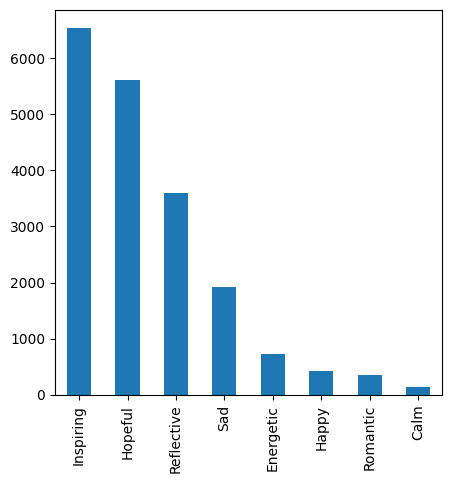

In [45]:
music_data['Mood'].value_counts().plot.bar();

In [91]:
music_data.describe().T

In [51]:
def clean_lyrics(lyric):
    # Your preprocessing code here (e.g., remove punctuations, convert to lowercase)
    lyric = re.sub(r'[^\w\s]', '', lyric)  # Remove punctuations
    return lyric.lower()  # Convert to lowercase
music_data['Lyric'] = music_data['Lyric'].apply(clean_lyrics)
    #return lyric

In [52]:
music_data['Lyric'] = music_data['Lyric'].apply(clean_lyrics)

In [53]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(music_data['Lyric'], music_data['Mood'], test_size=0.2, random_state=42)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
# Create a TF-IDF vectorizer and fit it to the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [47]:
"""
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)
"""

In [48]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 15419 samples for training and 3855 samples for testing.


In [57]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [59]:
svc.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [60]:
y_train

3366     Inspiring
2807     Inspiring
6095       Hopeful
7757           Sad
13529      Hopeful
           ...    
11284      Hopeful
11964      Hopeful
5390       Hopeful
860      Inspiring
15795    Inspiring
Name: Mood, Length: 15419, dtype: object

In [65]:
y_pred = svc.predict(X_test_tfidf)

              precision    recall  f1-score   support

        Calm       0.57      0.17      0.27        23
   Energetic       0.77      0.33      0.46       169
       Happy       0.80      0.38      0.51        88
     Hopeful       0.67      0.83      0.74      1099
   Inspiring       0.85      0.87      0.86      1285
  Reflective       0.74      0.75      0.74       714
    Romantic       0.89      0.33      0.48        72
         Sad       0.78      0.59      0.67       405

    accuracy                           0.76      3855
   macro avg       0.76      0.53      0.59      3855
weighted avg       0.77      0.76      0.75      3855



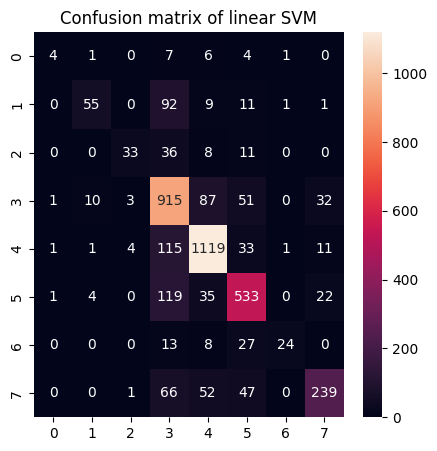

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))



---



---

